In [3]:
import numpy as np 
import pandas as pd
from sklearn.datasets import load_iris


In [4]:
data = load_iris()
X = data.data
y = data.target

In [5]:
# No.of folds
K = 5

In [6]:
folds = np.random.choice(K, size=X.shape[0], replace=True)

In [7]:
X_test = X[folds == 0]
y_test = y[folds == 0]

In [8]:
X_train = X[folds != 0]
y_train = y[folds != 0]

In [9]:
# Build decision tree clasifier
from sklearn.tree import DecisionTreeClassifier 
clf = DecisionTreeClassifier()
clf.fit(X_train, y_train)

,criterion,'gini'
,splitter,'best'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,None
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,None


In [ ]:
y_pred = clf.predict(X_test)


In [14]:
y_pred

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2])

In [11]:
from sklearn.metrics import confusion_matrix

In [15]:
cm

array([[ 9,  0,  0],
       [ 0,  7,  0],
       [ 0,  0, 10]])

In [13]:
cm = confusion_matrix(y_test, y_pred)
tp = cm[0,0]
tn = cm[1,1]
fp = cm[1,0]
fn = cm[0,1]

accuaracy = (tp + tn) / cm.sum()
precision = tp / (tp + fp)
recall = tp / (tp + fn)

In [16]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

In [17]:
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='macro')
recall = recall_score(y_test, y_pred, average='macro')
f1 = f1_score(y_test, y_pred, average='macro')

In [18]:
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")

Accuracy: 1.0000
Precision: 1.0000
Recall: 1.0000
F1 Score: 1.0000


In [19]:
# Build Decision Tree Classifier with hyperparameters

from sklearn.tree import DecisionTreeClassifier 
clf = DecisionTreeClassifier(
    criterion='gini',
    max_depth=3,
    splitter='best',
    min_samples_split=10,
    min_samples_leaf=2
)
clf.fit(X_train, y_train)

,criterion,'gini'
,splitter,'best'
,max_depth,3
,min_samples_split,10
,min_samples_leaf,2
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,None
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,None


In [21]:
y_pred = clf.predict(X_test)

In [24]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)

In [25]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='macro')
recall = recall_score(y_test, y_pred, average='macro')
f1 = f1_score(y_test, y_pred, average='macro')

In [26]:
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")

Accuracy: 1.0000
Precision: 1.0000
Recall: 1.0000
F1 Score: 1.0000


In [27]:
#parameter tuning

accuracy_dict = dict()
for depth in range(1, 11):
    for split in range(2,10):
        for leaf in range(1,5):
            clf = DecisionTreeClassifier(
                max_depth=depth,
                min_samples_split=split,
                min_samples_leaf=leaf
            )
            clf.fit(X_train, y_train)
            y_pred = clf.predict(X_test)
            accuracy = accuracy_score(y_test, y_pred)
            accuracy_dict[(depth, split, leaf)] = accuracy
            print(f"Depth: {depth}, Split: {split}, Leaf: {leaf} => Accuracy: {accuracy:.4f}")

Depth: 1, Split: 2, Leaf: 1 => Accuracy: 0.6154
Depth: 1, Split: 2, Leaf: 2 => Accuracy: 0.6154
Depth: 1, Split: 2, Leaf: 3 => Accuracy: 0.6154
Depth: 1, Split: 2, Leaf: 4 => Accuracy: 0.6154
Depth: 1, Split: 3, Leaf: 1 => Accuracy: 0.6154
Depth: 1, Split: 3, Leaf: 2 => Accuracy: 0.6154
Depth: 1, Split: 3, Leaf: 3 => Accuracy: 0.6154
Depth: 1, Split: 3, Leaf: 4 => Accuracy: 0.6154
Depth: 1, Split: 4, Leaf: 1 => Accuracy: 0.6154
Depth: 1, Split: 4, Leaf: 2 => Accuracy: 0.6154
Depth: 1, Split: 4, Leaf: 3 => Accuracy: 0.6154
Depth: 1, Split: 4, Leaf: 4 => Accuracy: 0.6154
Depth: 1, Split: 5, Leaf: 1 => Accuracy: 0.6154
Depth: 1, Split: 5, Leaf: 2 => Accuracy: 0.6154
Depth: 1, Split: 5, Leaf: 3 => Accuracy: 0.6154
Depth: 1, Split: 5, Leaf: 4 => Accuracy: 0.6154
Depth: 1, Split: 6, Leaf: 1 => Accuracy: 0.6154
Depth: 1, Split: 6, Leaf: 2 => Accuracy: 0.6154
Depth: 1, Split: 6, Leaf: 3 => Accuracy: 0.6154
Depth: 1, Split: 6, Leaf: 4 => Accuracy: 0.6154
Depth: 1, Split: 7, Leaf: 1 => Accuracy:

In [28]:
clf = DecisionTreeClassifier(
    max_depth=3,
    min_samples_split=2,
    min_samples_leaf=1
)
clf.fit(X_train, y_train)

,criterion,'gini'
,splitter,'best'
,max_depth,3
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,None
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,None


In [29]:
# plot decision tree
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt


[Text(0.375, 0.875, 'petal width (cm) <= 0.75\ngini = 0.666\nsamples = 124\nvalue = [41, 43, 40]\nclass = versicolor'),
 Text(0.25, 0.625, 'gini = 0.0\nsamples = 41\nvalue = [41, 0, 0]\nclass = setosa'),
 Text(0.3125, 0.75, 'True  '),
 Text(0.5, 0.625, 'petal width (cm) <= 1.75\ngini = 0.499\nsamples = 83\nvalue = [0, 43, 40]\nclass = versicolor'),
 Text(0.4375, 0.75, '  False'),
 Text(0.25, 0.375, 'petal length (cm) <= 4.95\ngini = 0.19\nsamples = 47\nvalue = [0, 42, 5]\nclass = versicolor'),
 Text(0.125, 0.125, 'gini = 0.048\nsamples = 41\nvalue = [0, 40, 1]\nclass = versicolor'),
 Text(0.375, 0.125, 'gini = 0.444\nsamples = 6\nvalue = [0, 2, 4]\nclass = virginica'),
 Text(0.75, 0.375, 'petal length (cm) <= 4.85\ngini = 0.054\nsamples = 36\nvalue = [0, 1, 35]\nclass = virginica'),
 Text(0.625, 0.125, 'gini = 0.444\nsamples = 3\nvalue = [0, 1, 2]\nclass = virginica'),
 Text(0.875, 0.125, 'gini = 0.0\nsamples = 33\nvalue = [0, 0, 33]\nclass = virginica')]

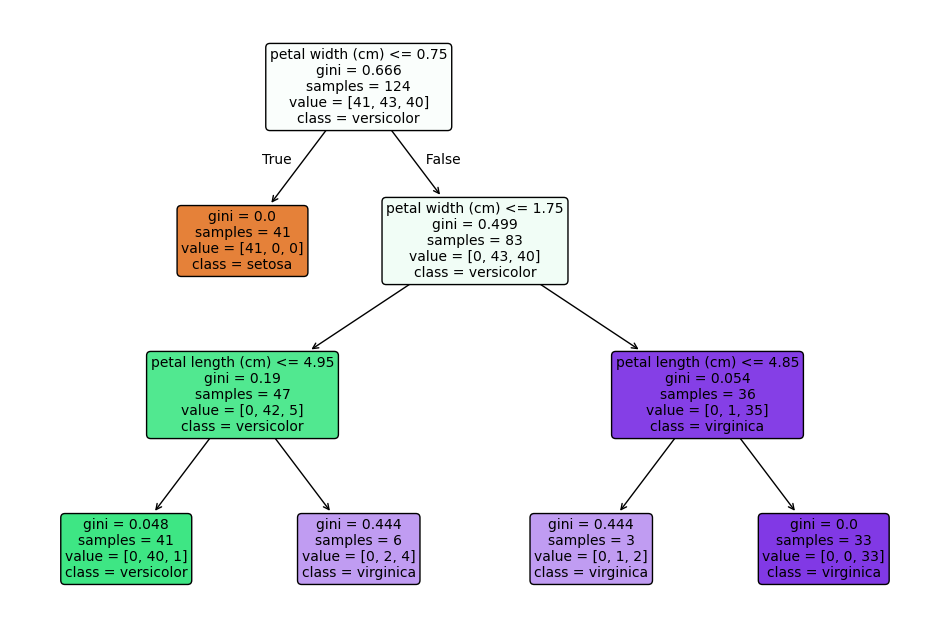

In [33]:
plt.figure(figsize=(12, 8))
plot_tree(clf,
            feature_names=data.feature_names,
            class_names=data.target_names,
            filled=True,
            rounded=True,
            fontsize=10)
            